In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Atom, BondType

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils_3 as utils


## initialize

In [3]:
target_smiles = "Cl[C@@H]1C[C@]([H])(C(C)(C)[C@]23C(C=CC=C4)=C4NC3=O)C2=C([N+]#[C-])[C@@]1(C=C)C"


In [4]:
target = Chem.MolToSmiles(Chem.MolFromSmiles(target_smiles))
target = Chem.MolFromSmiles(target)
Chem.Kekulize(target,clearAromaticFlags=True)

In [5]:
target_atoms = [atm.GetAtomicNum() for atm in target.GetAtoms()]
target_symbs = [atm.GetSymbol() for atm in target.GetAtoms()]

In [6]:
target_atoms[1] = 14

In [7]:
amat = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)
amat_init = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)

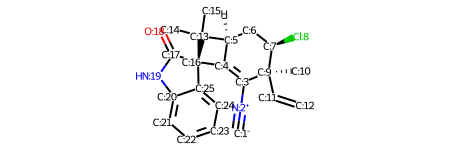

In [8]:
utils.mol_with_atom_index(target)

In [9]:
for i_m,m in enumerate(amat_init):
    print(i_m+1,np.where(m!=0)[0]+1)


1 [2]
2 [1 3]
3 [2 4 9]
4 [ 3  5 16]
5 [ 4  6 13]
6 [5 7]
7 [6 8 9]
8 [7]
9 [ 3  7 10 11]
10 [9]
11 [ 9 12]
12 [11]
13 [ 5 14 15 16]
14 [13]
15 [13]
16 [ 4 13 17 25]
17 [16 18 19]
18 [17]
19 [17 20]
20 [19 21 25]
21 [20 22]
22 [21 23]
23 [22 24]
24 [23 25]
25 [16 20 24]


### start

In [10]:
changelogs = utils.make_changelogs("./edit_files/edits_welwitindolinone_baran.csv")
changelogs[:3]

AddStereo
RingContraction
Oxidation
Isonitrile
RedAmination
FriedelCrafts
Indole
end


[{'edits': ()},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(9, 9, 1), (7, 7, 1), (5, 5, 1), (16, 16, 1)]},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(13, 16, -1),
   (13, 17, 1),
   (17, 18, -2),
   (17, 16, 1),
   (16, 16, -1)]}]

In [11]:
# check the changelogs here. usually the [1:] is because the first entry is blank.
out_1,final_atoms_1 = utils.apply_changes(amat_init, target_atoms,changelogs[1:])

In [12]:
for i in range(len(out_1)):
    print(i)
    try:
        m = utils.molFromAdjMat(final_atoms_1, out_1[i], sanitize=True)
        Chem.SanitizeMol(m)
        print(Chem.MolToSmiles(m))
    except Chem.rdchem.AtomValenceException as e:
        print(f"Valence error in molecule {i}: {e}")
        # Handle the error, e.g., by adjusting the valence or skipping the molecule
        continue

0
C.C=CC1(C)C(=O)CC(C(=C)C)CC1Cl.O.[SiH4].c1ccc2[nH]ccc2c1
1
C.C=CC1(C)C(=O)C(c2c[nH]c3ccccc23)C(C(=C)C)CC1Cl.O.[SiH4]
2
C.C=CC1(C)C(=O)C2c3c([nH]c4ccccc34)C(C)(C)C2CC1Cl.O.[SiH4]
3
C.C=CC1(C)C(Cl)CC2C(c3c([nH]c4ccccc34)C2(C)C)C1[SiH3].O.O
4
C#[Si]C1C2c3c([nH]c4ccccc34)C(C)(C)C2CC(Cl)C1(C)C=C.O.O
5
C#[Si]C1=C2c3c([nH]c4ccccc34)C(C)(C)C2CC(Cl)C1(C)C=C.O.O
6
C#[Si]C1=C2C(CC(Cl)C1(C)C=C)C(C)(C)C21C(=O)Nc2ccccc21.O
7
C#[Si]C1=C2C(CC(Cl)C1(C)C=C)C(C)(C)C21C(=O)Nc2ccccc21.O


In [14]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}
np.savez("./matrices/welwitindolinone_baran",**save_dict)